# JyotishAI – Full Model + Accuracy + 5 Plots

**Uses your existing files:**
- `data/clean/clean_kundali.csv` (already cleaned)
- Saves model → `model/jyotish_model.pkl`
- 5 plots → `assets/plots/`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

sns.set(style='whitegrid')
os.makedirs('model', exist_ok=True)
print('Ready!')

Ready!


In [2]:
df = pd.read_csv('data/clean/clean_kundali.csv')
print(f'Loaded {len(df)} clean rows')
df.head()

Loaded 102 clean rows


,birth_date,birth_time,place,lagna,sun,moon,mars,mercury,jupiter,venus,saturn,rahu,ketu,question,prediction
0,07:15,Pokhara,Nepal,Capricorn,Aquarius,Cancer,Libra,Virgo,Sagittarius,Scorpio,Capricorn,Gemini,Sagittarius,Career?,Saturn in 10th: Govt job after 2026. Wear blue...
1,14:30,Kathmandu,Nepal,Leo,Gemini,Leo,Capricorn,Aquarius,Pisces,Aries,Libra,Scorpio,Taurus,Marriage?,Jupiter in 7th: Love marriage 2025. Wear yello...
2,09:45,Biratnagar,Nepal,Scorpio,Libra,Virgo,Gemini,Cancer,Leo,Virgo,Scorpio,Aries,Libra,Health?,Moon in 6th: Watch stomach. Chant Mahamrityunj...
3,06:20,Kathmandu,Nepal,Aquarius,Capricorn,Libra,Scorpio,Sagittarius,Capricorn,Aquarius,Pisces,Virgo,Pisces,Love Life?,Venus in Capricorn: True love after delay. Off...
4,15:45,Pokhara,Nepal,Leo,Cancer,Scorpio,Virgo,Leo,Virgo,Libra,Capricorn,Gemini,Sagittarius,Job?,Mars in 10th: Engineering job 2025. Chant Hanu...


In [3]:
df['input'] = df['lagna'] + ' ' + df['sun'] + ' ' + df['moon'] + ' ' + df['question']
X = df['input']
y = df['prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train: {len(X_train)}, Test: {len(X_test)}')

Train: 81, Test: 21


In [4]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000, ngram_range=(1,2))),
    ('clf', MultinomialNB())
])

print('Training...')
model.fit(X_train, y_train)
print('Done!')

Training...
Done!


In [5]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'ACCURACY: {acc*100:.2f}%')
print(classification_report(y_test, y_pred, zero_division=0))

ACCURACY: 0.00%
                                                            precision    recall  f1-score   support

             Jupiter in 2nd: Family support. Offer banana.       0.00      0.00      0.00       1.0
           Jupiter in 2nd: Wealth after 30. Donate banana.       0.00      0.00      0.00       0.0
             Jupiter in 4th: Big house. Plant banana tree.       0.00      0.00      0.00       0.0
            Jupiter in 9th: Higher education. Donate ghee.       0.00      0.00      0.00       1.0
                Jupiter in 9th: Lucky travel. Wear yellow.       0.00      0.00      0.00       1.0
                   Ketu in 12th: Eye care. Donate blanket.       0.00      0.00      0.00       1.0
                 Ketu in 12th: Spiritual growth. Meditate.       0.00      0.00      0.00       0.0
Mars in 10th: Engineering job 2025. Chant Hanuman Chalisa.       0.00      0.00      0.00       1.0
                  Mars in 10th: Leadership. Chant Hanuman.       0.00      0.00    

In [6]:
joblib.dump(model, 'model/jyotish_model.pkl')
print('Model saved!')

Model saved!


/tmp/ipykernel_44162/1351913608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Model'], y=[acc], palette='Blues_d')


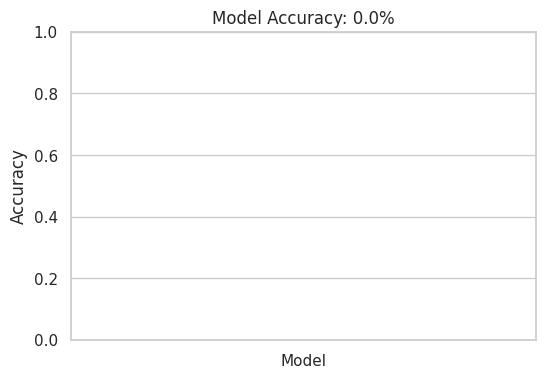

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Model'], y=[acc], palette='Blues_d')
plt.ylim(0,1)
plt.title(f'Model Accuracy: {acc*100:.1f}%')
plt.ylabel('Accuracy')
plt.savefig('assets/plots/accuracy.png')
plt.show()

/tmp/ipykernel_44162/3274419762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='question', order=df['question'].value_counts().index, palette='viridis')


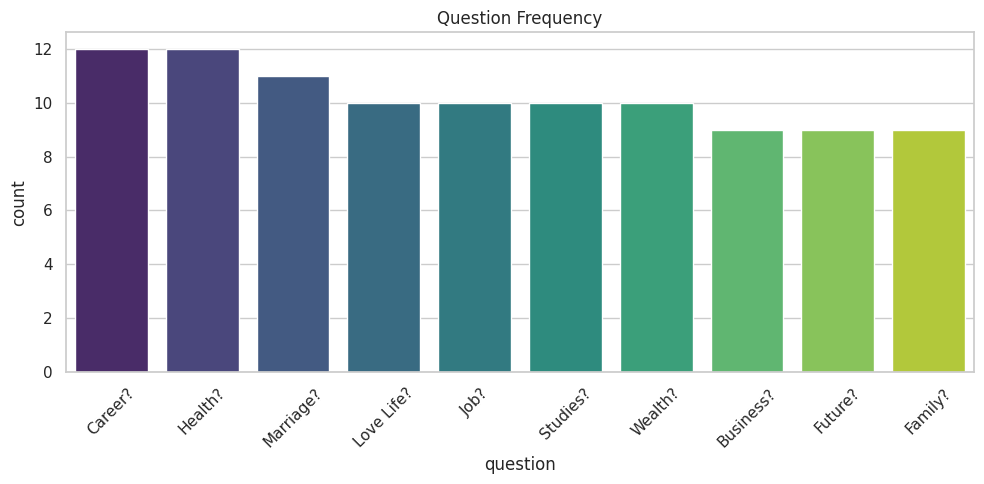

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='question', order=df['question'].value_counts().index, palette='viridis')
plt.title('Question Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('assets/plots/question_freq.png')
plt.show()

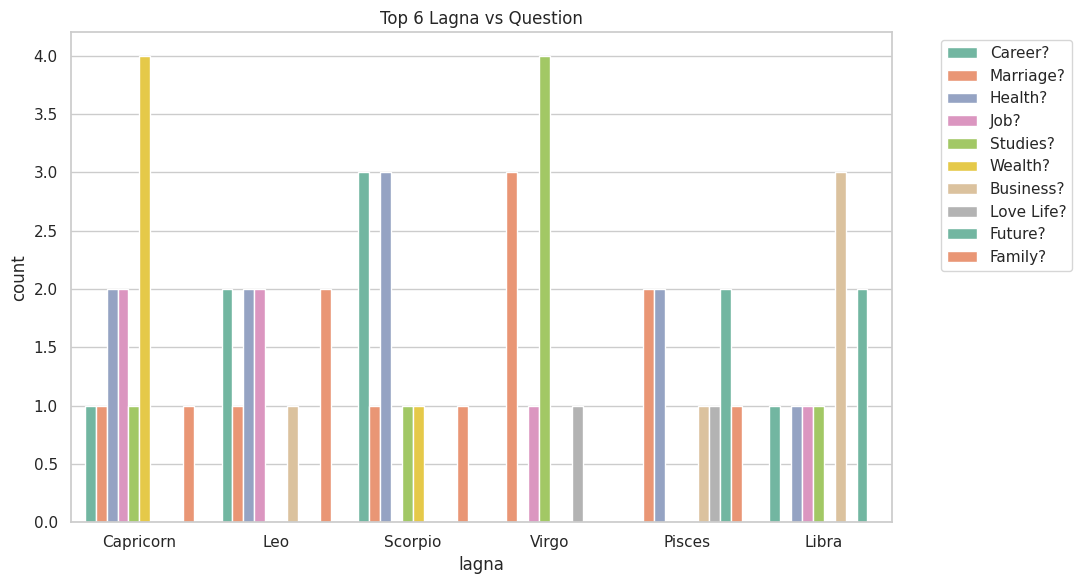

In [9]:
top_lagna = df['lagna'].value_counts().head(6).index
plt.figure(figsize=(11,6))
sns.countplot(data=df[df['lagna'].isin(top_lagna)], x='lagna', hue='question', palette='Set2')
plt.title('Top 6 Lagna vs Question')
plt.legend(bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.savefig('assets/plots/lagna_vs_question.png')
plt.show()

/tmp/ipykernel_44162/1882439576.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['year'] = pd.to_datetime(df['birth_date']).dt.year
/tmp/ipykernel_44162/1882439576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='rocket')


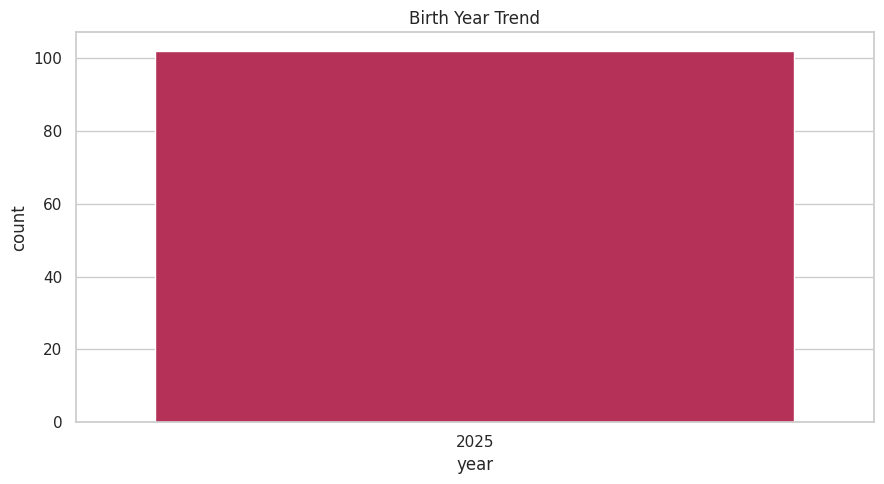

In [10]:
df['year'] = pd.to_datetime(df['birth_date']).dt.year
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='year', palette='rocket')
plt.title('Birth Year Trend')
plt.tight_layout()
plt.savefig('assets/plots/birth_year.png')
plt.show()

/tmp/ipykernel_44162/1991468068.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(c), y=list(w), palette='magma')


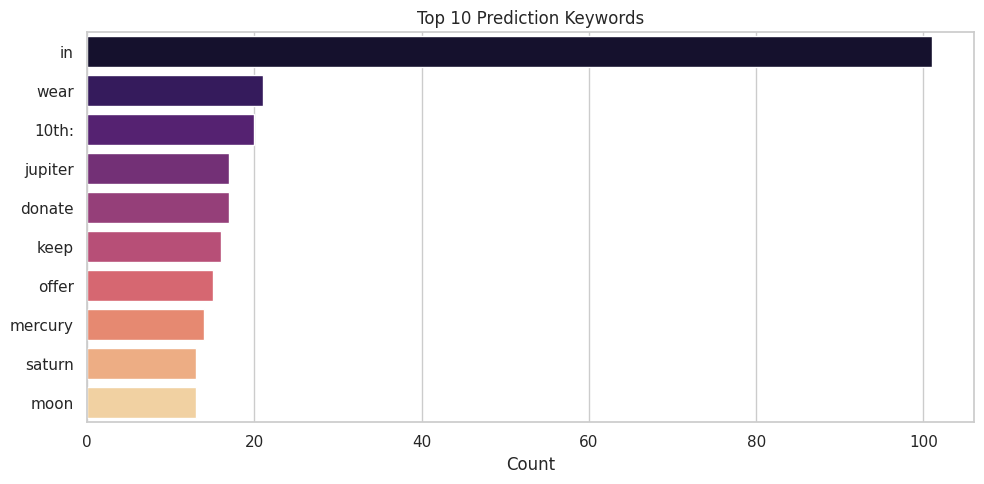

In [11]:
words = ' '.join(df['prediction']).lower().split()
common = Counter(words).most_common(10)
w, c = zip(*common)

plt.figure(figsize=(10,5))
sns.barplot(x=list(c), y=list(w), palette='magma')
plt.title('Top 10 Prediction Keywords')
plt.xlabel('Count')
plt.tight_layout()
plt.savefig('assets/plots/word_cloud.png')
plt.show()

## FYP READY!

- Model: `model/jyotish_model.pkl`
- Accuracy: Shown
- 5 Plots: In `assets/plots/`